In [3]:
import numpy as np
import glob
import math
from skimage import io,color,feature,exposure
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

In [4]:
def LBP(image,scale,row,col):
    
    lbpmat = np.zeros(shape=(r-2,c-2),dtype=np.uint8)
    
    for i in range(1,row-1):
        for j in range(1,col-1):
            window = image[i-1:i+2,j-1:j+2]
            binary = window>window[1,1]
            lbpmat[i-1,j-1] = (sum(sum(binary*scale)))
    
    return lbpmat

In [2]:
def histogram(image,bins=256):
    hist = np.zeros(shape=bins)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            hist[image[i,j]]+=1
    
    return hist

In [7]:
def LTP(image,scale,row,col,thres):
    
    ltpmat1 = np.zeros(shape=(r-2,c-2),dtype=np.uint8)
    ltpmat2 = np.zeros(shape=(r-2,c-2),dtype=np.uint8)

    for i in range(1,row-1):
        for j in range(1,col-1):
            window = image[i-1:i+2,j-1:j+2]
            a=window[1,1]-thres
            b=window[1,1]+thres
            binary1=window>=b
            binary2=window<=a
            ltpmat1[i-1,j-1] = (sum(sum(binary1*scale)))
            ltpmat2[i-1,j-1] = (sum(sum(binary2*scale)))
    
    return ltpmat1,ltpmat2

In [8]:
def GLCM(image,d,theta,levels):
    return feature.greycomatrix(image,d,theta,levels=levels)

In [9]:
def CoLTP_feature_vector(image):
    scale1 = np.array([[2,0,1],[0,0,0],[4,0,8]],dtype=np.uint8)
    scale2 = np.array([[4,2,1],[8,0,128],[16,32,64]],dtype=np.uint8)
    (r,c) = image.shape
    threshold=5
    ltpmat1,ltpmat2 = LTP(image,scale1,r,c,threshold)
    lbpmat=LBP(image,scale2,r,c)
    
    d=[4]
    theta=[0,np.pi/4,np.pi/2,3*np.pi/4]
    levels=16
    ltpg1 = GLCM(ltpmat1,d,theta,levels).flatten()
    ltpg2 = GLCM(ltpmat2,d,theta,levels).flatten()
    lbph = histogram(lbpmat,256)
    return np.concatenate((ltpg1,ltpg2,lbph))

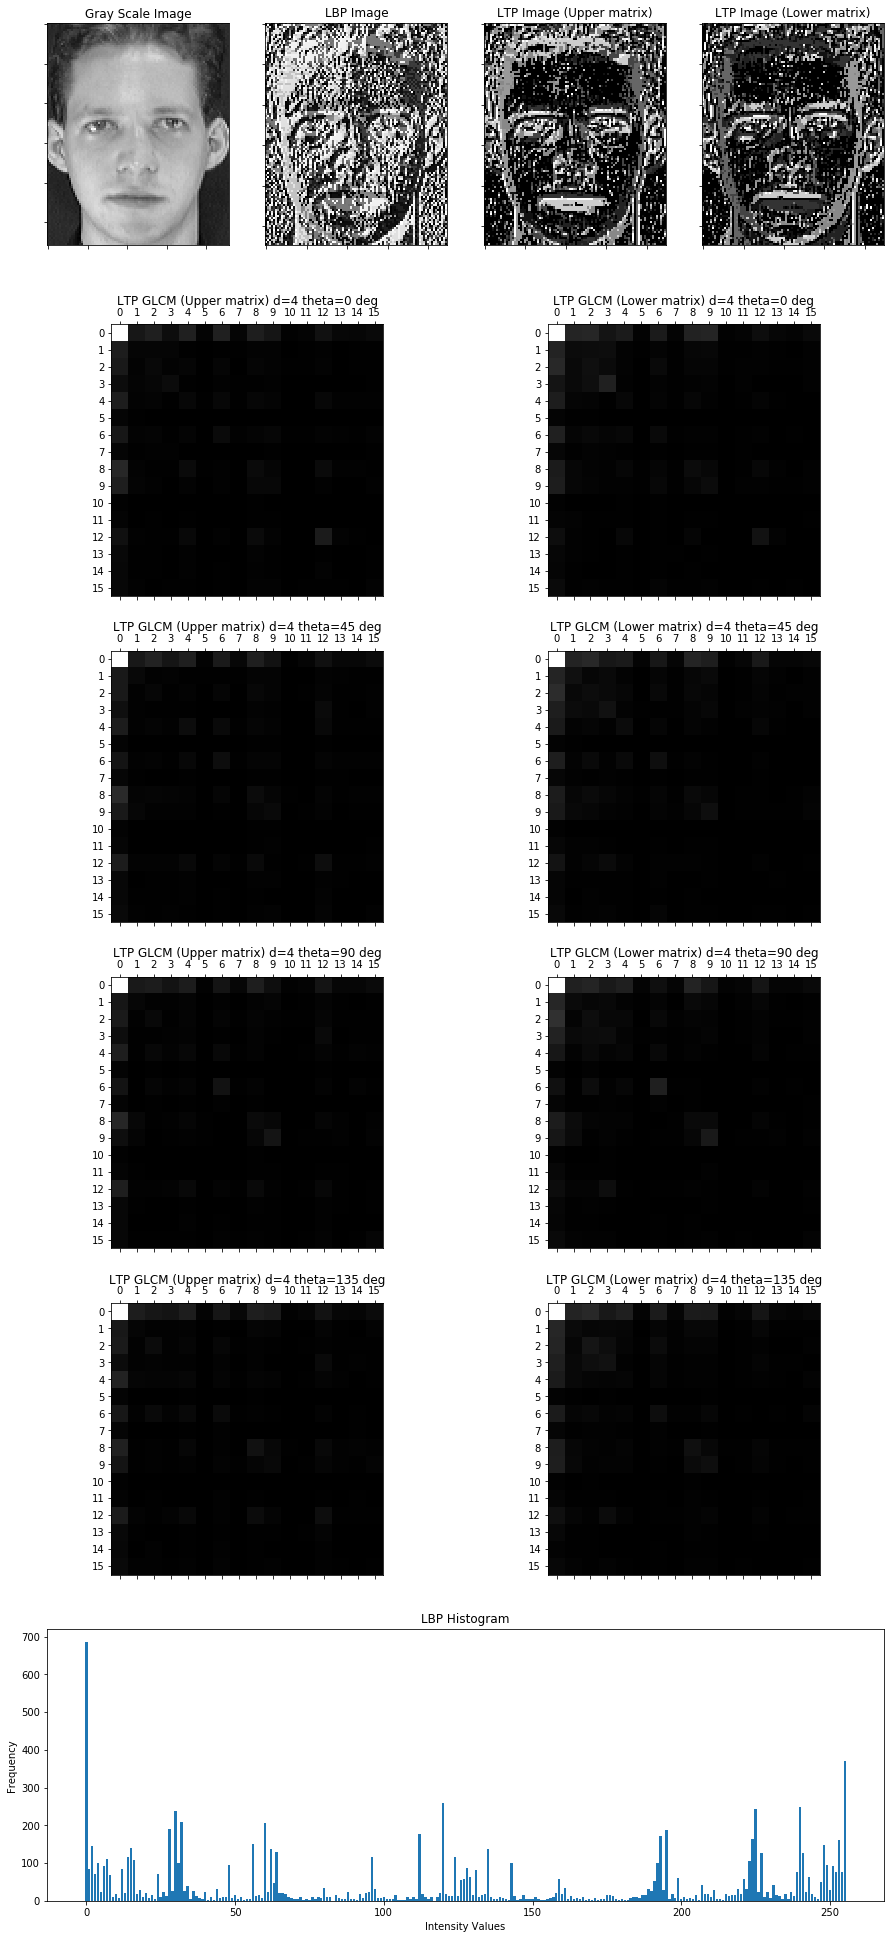

In [17]:
image = io.imread('orl_faces\\s01\\1.pgm')
scale1 = np.array([[2,0,1],[0,0,0],[4,0,8]],dtype=np.uint8)
scale2 = np.array([[4,2,1],[8,0,128],[16,32,64]],dtype=np.uint8)
(r,c) = image.shape
threshold=5
ltp_image1,ltp_image2=LTP(image,scale1,r,c,threshold)
lbp_image=LBP(image,scale2,r,c)
hist = histogram(lbp_image,256)
d=[4]
theta=[0,np.pi/4,np.pi/2,3*np.pi/4]
levels=16
ltpg1 = GLCM(ltp_image1,d,theta,levels)
ltpg2 = GLCM(ltp_image2,d,theta,levels)

fig = plt.figure(figsize=(15,35))
gs=GridSpec(6,4)

ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax2i=fig.add_subplot(gs[0,2])
ax2ii=fig.add_subplot(gs[0,3])
ax3=fig.add_subplot(gs[1,0:2])
ax4=fig.add_subplot(gs[1,2:])
ax5=fig.add_subplot(gs[2,0:2])
ax6=fig.add_subplot(gs[2,2:])
ax7=fig.add_subplot(gs[3,0:2])
ax8=fig.add_subplot(gs[3,2:])
ax9=fig.add_subplot(gs[4,0:2])
ax10=fig.add_subplot(gs[4,2:])
axhist=fig.add_subplot(gs[5,:])

ax2i.set_title('LTP Image (Upper matrix)')
ax2i.imshow(ltp_image1,cmap='gray')
ax2i.set_yticklabels([])
ax2i.set_xticklabels([])

ax2ii.set_title('LTP Image (Lower matrix)')
ax2ii.imshow(ltp_image2,cmap='gray')
ax2ii.set_yticklabels([])
ax2ii.set_xticklabels([])

ax1.set_title('Gray Scale Image')
ax1.imshow(image,cmap='gray')
ax1.set_yticklabels([])
ax1.set_xticklabels([])

ax2.set_title('LBP Image')
ax2.imshow(lbp_image,cmap='gray')
ax2.set_yticklabels([])
ax2.set_xticklabels([])


ax3.matshow(ltpg1[:,:,0,0],cmap=plt.cm.gray)
ax3.set_title('LTP GLCM (Upper matrix) d=4 theta=0 deg')
ax3.set_xticks(np.arange(0,16))
ax3.set_yticks(np.arange(0,16))

ax4.matshow(ltpg2[:,:,0,0],cmap=plt.cm.gray)
ax4.set_title('LTP GLCM (Lower matrix) d=4 theta=0 deg')
ax4.set_xticks(np.arange(0,16))
ax4.set_yticks(np.arange(0,16))

ax5.matshow(ltpg1[:,:,0,1],cmap=plt.cm.gray)
ax5.set_title('LTP GLCM (Upper matrix) d=4 theta=45 deg')
ax5.set_xticks(np.arange(0,16))
ax5.set_yticks(np.arange(0,16))

ax6.matshow(ltpg2[:,:,0,1],cmap=plt.cm.gray)
ax6.set_title('LTP GLCM (Lower matrix) d=4 theta=45 deg')
ax6.set_xticks(np.arange(0,16))
ax6.set_yticks(np.arange(0,16))

ax7.matshow(ltpg1[:,:,0,2],cmap=plt.cm.gray)
ax7.set_title('LTP GLCM (Upper matrix) d=4 theta=90 deg')
ax7.set_xticks(np.arange(0,16))
ax7.set_yticks(np.arange(0,16))

ax8.matshow(ltpg2[:,:,0,2],cmap=plt.cm.gray)
ax8.set_title('LTP GLCM (Lower matrix) d=4 theta=90 deg')
ax8.set_xticks(np.arange(0,16))
ax8.set_yticks(np.arange(0,16))

ax9.matshow(ltpg1[:,:,0,3],cmap=plt.cm.gray)
ax9.set_title('LTP GLCM (Upper matrix) d=4 theta=135 deg')
ax9.set_xticks(np.arange(0,16))
ax9.set_yticks(np.arange(0,16))

ax10.matshow(ltpg2[:,:,0,3],cmap=plt.cm.gray)
ax10.set_title('LTP GLCM (Lower matrix) d=4 theta=135 deg')
ax10.set_xticks(np.arange(0,16))
ax10.set_yticks(np.arange(0,16))

axhist.bar(range(0,256),hist)
axhist.set_xlabel('Intensity Values')
axhist.set_ylabel('Frequency')
axhist.set_title('LBP Histogram')

plt.show()


In [18]:
coltp_feature_matrix = []
k=1
for img_file in glob.glob("orl_faces\\**\\*.pgm"):
    print("processing image : ",k,": ",img_file)
    image = io.imread(img_file)
    coltp_feature_matrix.append(CoLTP_feature_vector(image))
    k+=1
    
np.savetxt("CSV\\orl_faces_CoLTP_LBP_FeatureMatrix.csv",coltp_feature_matrix,fmt='%f',delimiter=",")

processing image :  1 :  orl_faces\s01\0.pgm
processing image :  2 :  orl_faces\s01\1.pgm
processing image :  3 :  orl_faces\s01\2.pgm
processing image :  4 :  orl_faces\s01\3.pgm
processing image :  5 :  orl_faces\s01\4.pgm
processing image :  6 :  orl_faces\s01\5.pgm
processing image :  7 :  orl_faces\s01\6.pgm
processing image :  8 :  orl_faces\s01\7.pgm
processing image :  9 :  orl_faces\s01\8.pgm
processing image :  10 :  orl_faces\s01\9.pgm
processing image :  11 :  orl_faces\s02\0.pgm
processing image :  12 :  orl_faces\s02\1.pgm
processing image :  13 :  orl_faces\s02\2.pgm
processing image :  14 :  orl_faces\s02\3.pgm
processing image :  15 :  orl_faces\s02\4.pgm
processing image :  16 :  orl_faces\s02\5.pgm
processing image :  17 :  orl_faces\s02\6.pgm
processing image :  18 :  orl_faces\s02\7.pgm
processing image :  19 :  orl_faces\s02\8.pgm
processing image :  20 :  orl_faces\s02\9.pgm
processing image :  21 :  orl_faces\s03\0.pgm
processing image :  22 :  orl_faces\s03\1.p

processing image :  178 :  orl_faces\s18\7.pgm
processing image :  179 :  orl_faces\s18\8.pgm
processing image :  180 :  orl_faces\s18\9.pgm
processing image :  181 :  orl_faces\s19\0.pgm
processing image :  182 :  orl_faces\s19\1.pgm
processing image :  183 :  orl_faces\s19\2.pgm
processing image :  184 :  orl_faces\s19\3.pgm
processing image :  185 :  orl_faces\s19\4.pgm
processing image :  186 :  orl_faces\s19\5.pgm
processing image :  187 :  orl_faces\s19\6.pgm
processing image :  188 :  orl_faces\s19\7.pgm
processing image :  189 :  orl_faces\s19\8.pgm
processing image :  190 :  orl_faces\s19\9.pgm
processing image :  191 :  orl_faces\s20\0.pgm
processing image :  192 :  orl_faces\s20\1.pgm
processing image :  193 :  orl_faces\s20\2.pgm
processing image :  194 :  orl_faces\s20\3.pgm
processing image :  195 :  orl_faces\s20\4.pgm
processing image :  196 :  orl_faces\s20\5.pgm
processing image :  197 :  orl_faces\s20\6.pgm
processing image :  198 :  orl_faces\s20\7.pgm
processing im

processing image :  353 :  orl_faces\s36\2.pgm
processing image :  354 :  orl_faces\s36\3.pgm
processing image :  355 :  orl_faces\s36\4.pgm
processing image :  356 :  orl_faces\s36\5.pgm
processing image :  357 :  orl_faces\s36\6.pgm
processing image :  358 :  orl_faces\s36\7.pgm
processing image :  359 :  orl_faces\s36\8.pgm
processing image :  360 :  orl_faces\s36\9.pgm
processing image :  361 :  orl_faces\s37\0.pgm
processing image :  362 :  orl_faces\s37\1.pgm
processing image :  363 :  orl_faces\s37\2.pgm
processing image :  364 :  orl_faces\s37\3.pgm
processing image :  365 :  orl_faces\s37\4.pgm
processing image :  366 :  orl_faces\s37\5.pgm
processing image :  367 :  orl_faces\s37\6.pgm
processing image :  368 :  orl_faces\s37\7.pgm
processing image :  369 :  orl_faces\s37\8.pgm
processing image :  370 :  orl_faces\s37\9.pgm
processing image :  371 :  orl_faces\s38\0.pgm
processing image :  372 :  orl_faces\s38\1.pgm
processing image :  373 :  orl_faces\s38\2.pgm
processing im

In [19]:
def cityBlockDistance(feature_matrix):
    (row,col)=np.shape(feature_matrix)
    city_block_distance_matrix = np.zeros(shape=(row,row),dtype=np.double)
    for i in range(row):
        for j in range(i+1,row):
            city_block_distance_matrix[i,j] = city_block_distance_matrix[j,i] = sum(np.abs(feature_matrix[i]-feature_matrix[j]))
    return city_block_distance_matrix

In [20]:
def euclideanDistance(feature_matrix):
    (row,col)=np.shape(feature_matrix)
    euclidean_distance_matrix = np.zeros(shape=(row,row),dtype=np.double)
    for i in range(row):
        for j in range(i+1,row):
            euclidean_distance_matrix[i,j] = euclidean_distance_matrix[j,i] = math.sqrt(sum(np.square(feature_matrix[i]-feature_matrix[j])))
    return euclidean_distance_matrix

In [21]:
def d1Distance(feature_matrix):
    (row,col)=np.shape(feature_matrix)
    d1_distance_matrix = np.zeros(shape=(row,row),dtype=np.double)
    for i in range(row):
        for j in range(i+1,row):
            d1_distance_matrix[i,j] = d1_distance_matrix[j,i] = sum(abs((feature_matrix[i]-feature_matrix[j])/(1+feature_matrix[i]+feature_matrix[j])))
    return d1_distance_matrix

In [22]:
city_block_distance_matrix = cityBlockDistance(np.array(coltp_feature_matrix,dtype=np.double))
euclidean_distance_matrix = euclideanDistance(np.array(coltp_feature_matrix,dtype=np.double))
d1_distance_matrix = d1Distance(np.array(coltp_feature_matrix,dtype=np.double))

np.savetxt("CSV\\coltp_lbp_distance\\orl_faces_coltp_lbp_CityBlockDistanceMatrix.csv",city_block_distance_matrix,fmt='%f',delimiter=",")
np.savetxt("CSV\\coltp_lbp_distance\\orl_faces_coltp_lbp_EuclideanDistanceMatrix.csv",euclidean_distance_matrix,fmt='%f',delimiter=",")
np.savetxt("CSV\\coltp_lbp_distance\\orl_faces_coltp_lbp_D1DistanceMatrix.csv",d1_distance_matrix,fmt='%f',delimiter=",")

In [23]:
def averagePrecision(distance_matrix,classes,retrive_images,relevant_images_DB):
    
    class_precision = [0]*classes
    
    i=0
    for distmat in distance_matrix:
        relevant_images=sum(np.floor(np.argsort(distmat)[:retrive_images]/relevant_images_DB)==math.floor(i/relevant_images_DB))
        class_precision[math.floor(i/relevant_images_DB)]+=relevant_images/retrive_images
        l=i
        i=i+1;
        if math.floor(i/relevant_images_DB)!=math.floor(l/relevant_images_DB):
            class_precision[math.floor(l/relevant_images_DB)]/=relevant_images_DB
            
    class_precision*=100
    average_precision = sum(class_precision)/classes
    
    return class_precision,average_precision

In [24]:
def averageRecall(distance_matrix,classes,retrive_images,relevant_images_DB):
    
    class_recall = [0]*classes
    
    i=0
    for distmat in distance_matrix:
        relevant_images=sum(np.floor(np.argsort(distmat)[:retrive_images]/relevant_images_DB)==math.floor(i/relevant_images_DB))
        class_recall[math.floor(i/relevant_images_DB)]+=relevant_images/relevant_images_DB
        l=i
        i=i+1;
        if math.floor(i/relevant_images_DB)!=math.floor(l/relevant_images_DB):
            class_recall[math.floor(l/relevant_images_DB)]/=relevant_images_DB
    class_recall*=100
    average_recall = sum(class_recall)/classes
    return class_recall,average_recall

In [25]:
classes = 40
retrive_images = 30
relevant_images_DB = 10

city_block_class_precision,city_block_average_precision = averagePrecision(city_block_distance_matrix,classes,retrive_images,relevant_images_DB)
city_block_class_recall,city_block_average_recall = averageRecall(city_block_distance_matrix,classes,retrive_images,relevant_images_DB)

euclidean_class_precision,euclidean_average_precision = averagePrecision(euclidean_distance_matrix,classes,retrive_images,relevant_images_DB)
euclidean_class_recall,euclidean_average_recall = averageRecall(euclidean_distance_matrix,classes,retrive_images,relevant_images_DB)

d1_class_precision,d1_average_precision = averagePrecision(d1_distance_matrix,classes,retrive_images,relevant_images_DB)
d1_class_recall,d1_average_recall = averageRecall(d1_distance_matrix,classes,retrive_images,relevant_images_DB)
print('City Block Average Precision: '+str(city_block_average_precision)+'%')
print('City Block Average Recall: '+str(city_block_average_recall)+'%')
print('Euclidean Average Precision: '+str(euclidean_average_precision)+'%')
print('Euclidean Average Recall: '+str(euclidean_average_recall)+'%')
print('D1 Average Precision: '+str(d1_average_precision)+'%')
print('D1 Average Recall: '+str(d1_average_recall)+'%')

City Block Average Precision: 25.866666666666468%
City Block Average Recall: 77.59999999999964%
Euclidean Average Precision: 21.39999999999971%
Euclidean Average Recall: 64.20000000000019%
D1 Average Precision: 26.399999999999892%
D1 Average Recall: 79.19999999999932%


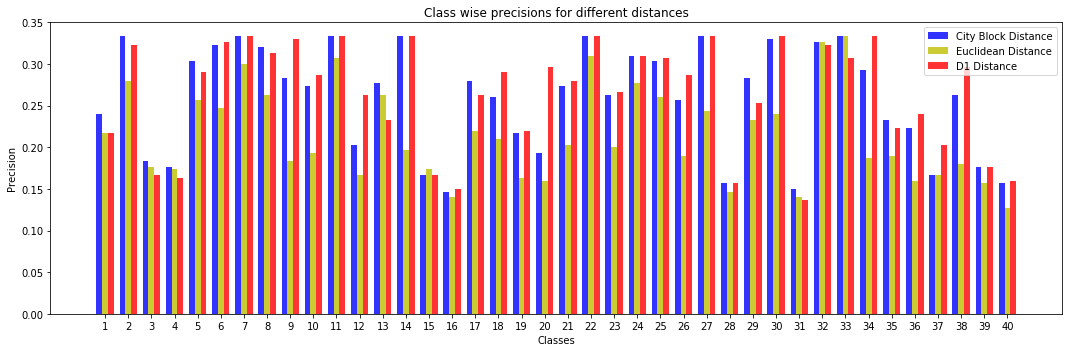

In [26]:
n_groups = 40
 
fig, ax = plt.subplots(figsize=(15, 5))

index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8
 
rects1 = plt.bar(index, city_block_class_precision[0:40], bar_width, alpha=opacity, color='b', label='City Block Distance')
rects2 = plt.bar(index + bar_width, euclidean_class_precision[0:40], bar_width, alpha=opacity, color='y', label='Euclidean Distance')
rects3 = plt.bar(index + 2*bar_width, d1_class_precision[0:40], bar_width, alpha=opacity, color='r', label='D1 Distance')
 
plt.xlabel('Classes')
plt.ylabel('Precision')
plt.title('Class wise precisions for different distances')
plt.xticks(index + bar_width, range(1,41))
plt.legend()
 
plt.tight_layout()
plt.show()

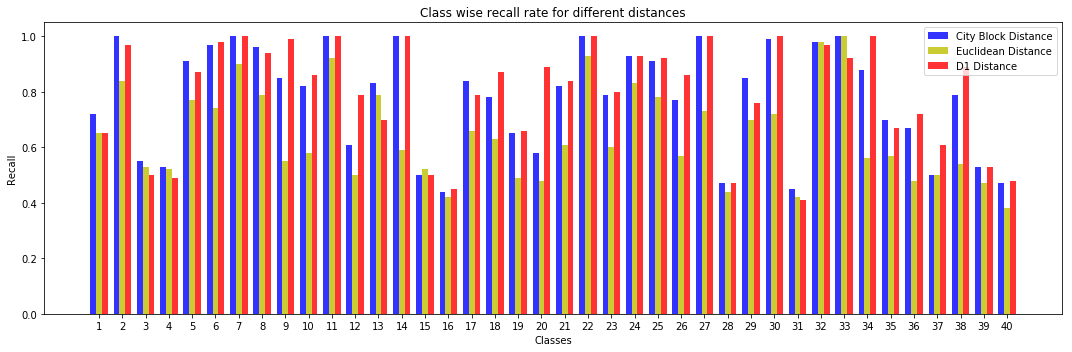

In [27]:
n_groups = 40
 
fig, ax = plt.subplots(figsize=(15, 5))

index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8
 
rects1 = plt.bar(index, city_block_class_recall[0:40], bar_width, alpha=opacity, color='b', label='City Block Distance')
rects2 = plt.bar(index + bar_width, euclidean_class_recall[0:40], bar_width, alpha=opacity, color='y', label='Euclidean Distance')
rects3 = plt.bar(index + 2*bar_width, d1_class_recall[0:40], bar_width, alpha=opacity, color='r', label='D1 Distance')
 
plt.xlabel('Classes')
plt.ylabel('Recall')
plt.title('Class wise recall rate for different distances')
plt.xticks(index + bar_width, range(1,41))
plt.legend()
 
plt.tight_layout()
plt.show()

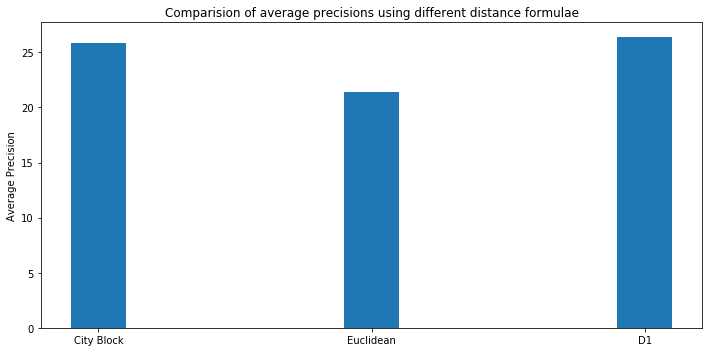

In [28]:
distances = ('City Block','Euclidean','D1')
y_pos = np.arange(len(distances))
average_precisions = [city_block_average_precision,euclidean_average_precision,d1_average_precision]
plt.figure(figsize=(10,5))
plt.bar(y_pos, average_precisions,0.2 ,align='center')
plt.xticks(y_pos, distances)
plt.ylabel('Average Precision')
plt.title('Comparision of average precisions using different distance formulae')
plt.tight_layout()
plt.show()

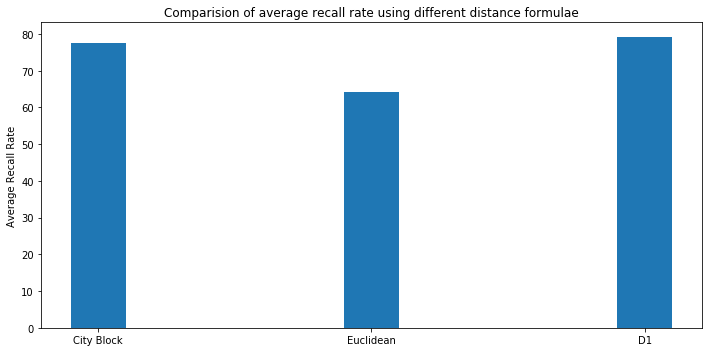

In [30]:
average_recalls = [city_block_average_recall,euclidean_average_recall,d1_average_recall]
plt.figure(figsize=(10,5))
plt.bar(y_pos, average_recalls,0.2 ,align='center')
plt.xticks(y_pos, distances)
plt.ylabel('Average Recall Rate')
plt.title('Comparision of average recall rate using different distance formulae')
plt.tight_layout()
plt.show()

In [31]:
city_block_average_precisions = []
city_block_average_recalls = []
euclidean_average_precisions = []
euclidean_average_recalls = []
d1_average_precisions = []
d1_average_recalls = []
for retrive_images in range(1,10):
    city_block_average_precisions.append(averagePrecision(city_block_distance_matrix,classes,retrive_images,relevant_images_DB)[1])
    city_block_average_recalls.append(averageRecall(city_block_distance_matrix,classes,retrive_images,relevant_images_DB)[1])
    euclidean_average_precisions.append(averagePrecision(euclidean_distance_matrix,classes,retrive_images,relevant_images_DB)[1])
    euclidean_average_recalls.append(averageRecall(euclidean_distance_matrix,classes,retrive_images,relevant_images_DB)[1])
    d1_average_precisions.append(averagePrecision(d1_distance_matrix,classes,retrive_images,relevant_images_DB)[1])
    d1_average_recalls.append(averageRecall(d1_distance_matrix,classes,retrive_images,relevant_images_DB)[1])
    

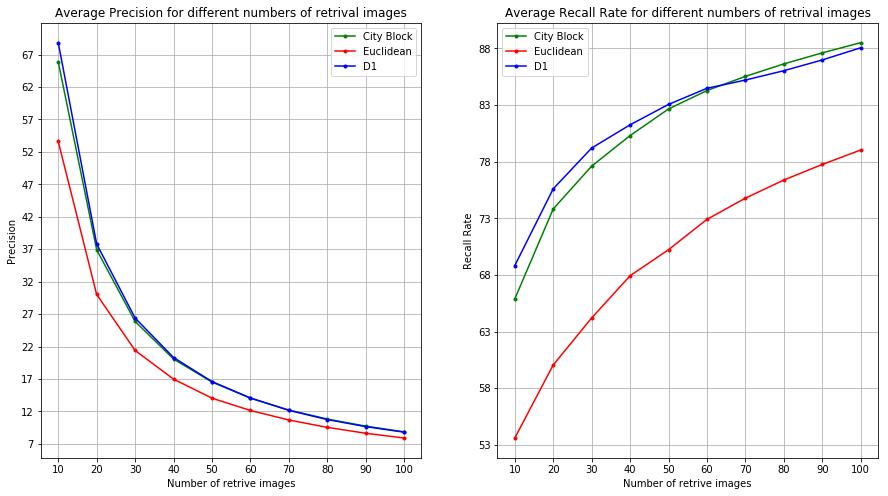

In [33]:
fig = plt.figure(figsize=(15,8))
gs=GridSpec(1,2)
index = range(1,10)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])

ax1.plot(index,city_block_average_precisions,'-g.',label='City Block')
ax1.plot(index,euclidean_average_precisions,'-r.',label='Euclidean')
ax1.plot(index,d1_average_precisions,'-b.',label='D1')
ax1.set_xlabel('Number of retrive images')
ax1.set_ylabel('Precision')
ax1.set_title('Average Precision for different numbers of retrival images')
ax1.set_xticks(range(1,10))
ax1.set_yticks(np.arange(math.floor(min(min(d1_average_precisions),min(euclidean_average_precisions),min(city_block_average_precisions))), max(max(d1_average_precisions),max(euclidean_average_precisions),max(city_block_average_precisions))+1, 5.0))
ax1.grid()
ax1.legend()

ax2.plot(index,city_block_average_recalls,'-g.',label='City Block')
ax2.plot(index,euclidean_average_recalls,'-r.',label='Euclidean')
ax2.plot(index,d1_average_recalls,'-b.',label='D1')
ax2.set_xlabel('Number of retrive images')
ax2.set_ylabel('Recall Rate')
ax2.set_title('Average Recall Rate for different numbers of retrival images')
ax2.set_xticks(range(1,10))
ax2.set_yticks(np.arange(math.floor(min(min(d1_average_recalls),min(euclidean_average_recalls),min(city_block_average_recalls))), max(max(d1_average_recalls),max(euclidean_average_recalls),max(city_block_average_recalls))+1, 5.0))
ax2.grid()
ax2.legend()

plt.show()


In [1]:
query=int(input("Enter an image: (0-399):"))

Enter an image: (0-399):223


In [ ]:
queryclass=math.floor(query/10)
queryimg=query%10
queryimage=io.imread("orl_faces\\s"+str(queryclass+1).zfill(2)+"\\"+str(queryimg)+".pgm")

query_coltp_feature=CoLTP_feature_vector(queryimage)

coltp_lbp_feature_matrix=np.array(coltp_lbp_feature_matrix,dtype=np.double)
distance_matrix_city_block=np.zeros(shape=(coltp_lbp_feature_matrix.shape[0]),dtype=np.double)
for i in range(coltp_lbp_feature_matrix.shape[0]):
    distance_matrix_city_block[i]=sum(np.abs(query_coltp_lbp_feature-coltp_lbp_feature_matrix[i]))

best=8
bestimgs=np.argsort(distance_matrix_city_block)[:best]
classes=np.floor(bestimgs/10).astype(np.intc)+1
imgs=bestimgs%10

retrieve_images=[]
for i in range(best):
    image=io.imread("orl_faces\\s"+str(classes[i]).zfill(2)+"\\"+str(imgs[i])+".pgm")
    retrieve_images.append(image)
    
print("User Given Image:-")

fig = plt.figure(figsize=(8,8))
gs=GridSpec(int(math.floor(best/4))+1,4)

ax1=fig.add_subplot(gs[0,:])
ax1.imshow(queryimage,cmap='gray')
ax1.set_yticklabels([])
ax1.set_xticklabels([])

for i in range(best):
    ax=fig.add_subplot(gs[math.floor(i/4)+1,i%4])
    ax.imshow(retrieve_images[i],cmap='gray')
    ax.set_yticklabels([])
    ax.set_xticklabels([])

fig.show()